# Cats or Dogs???
## Coded in Keras

## Load Packages

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras import regularizers
import h5py

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [2]:
# Import MobileNetV2
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Sequential

## Load datasets

In [3]:
# Check training set groups in a h5 file 
a = h5py.File('datasets/train_catVdog.h5', "r")
list(a)

['train_list_classes', 'train_set_x', 'train_set_y']

In [4]:
# Check dev set groups in a h5 file 
b = h5py.File('datasets/dev_catVdog.h5', "r")
list(b)

['dev_list_classes', 'dev_set_x', 'dev_set_y']

In [5]:
# Check test set groups in a h5 file
c = h5py.File('datasets/test_catVdog.h5', "r")
list(c)

['test_list_classes', 'test_set_x', 'test_set_y']

In [6]:
# dataset constant
DATAPATH_TRAIN = 'train_catVdog'
DATAPATH_DEV = 'dev_catVdog'
DATAPATH_TEST = 'test_catVdog'

In [7]:
def load_dataset():
    train_dataset = h5py.File('datasets/'+ DATAPATH_TRAIN +'.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    dev_dataset = h5py.File('datasets/'+ DATAPATH_DEV +'.h5', "r")
    dev_set_x_orig = np.array(dev_dataset["dev_set_x"][:]) # your dev set features
    dev_set_y_orig = np.array(dev_dataset["dev_set_y"][:]) # your dev set labels

    test_dataset = h5py.File('datasets/'+ DATAPATH_TEST +'.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["test_list_classes"][:]) # the list of classes
    
    #train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    #test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, dev_set_x_orig, dev_set_y_orig ,test_set_x_orig, test_set_y_orig, classes

In [8]:
X_train_orig, Y_train_orig, X_dev_orig, Y_dev_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [9]:
X_train_orig.shape

(8000, 128, 128, 3)

In [10]:
Y_train_orig.shape

(1, 8000)

In [11]:
X_dev_orig.shape

(1000, 128, 128, 3)

In [12]:
Y_dev_orig.shape

(1, 1000)

In [13]:
X_test_orig.shape

(1000, 128, 128, 3)

In [14]:
Y_test_orig.shape

(1, 1000)

## Data processing and check shape

In [15]:
# Data processing
# Normalize image vectors
X_train = X_train_orig/255.
X_dev = X_dev_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_dev = Y_dev_orig.T
Y_test = Y_test_orig.T

In [16]:
# check the shape of each dataset
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of dev examples = " + str(X_dev.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_dev shape: " + str(X_dev.shape))
print ("Y_dev shape: " + str(Y_dev.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 8000
number of dev examples = 1000
number of test examples = 1000
X_train shape: (8000, 128, 128, 3)
Y_train shape: (8000, 1)
X_dev shape: (1000, 128, 128, 3)
Y_dev shape: (1000, 1)
X_test shape: (1000, 128, 128, 3)
Y_test shape: (1000, 1)


## Build CNN model in Keras using MobileNetV2

In [17]:
def model(input_shape):
    # Define the input image
    base_model = MobileNetV2(include_top=False,weights="imagenet",input_shape=input_shape)
    base_model.trainable = False
    model = Sequential([base_model], name = "CatVDog11")
    
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid', activity_regularizer=regularizers.l2(0.01), name='fully_connected_0'))

    model.summary()
 
    return model

## Create the model

In [18]:
catVDogModel = model(X_train.shape[1:])

9412608/9406464 [==============================] - 76s 8us/step
Model: "CatVDog11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 1280)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5120)              0         
_________________________________________________________________
fully_connected_0 (Dense)    (None, 1)                 5121      
Total params: 2,263,105
Trainable params: 5,121
Non-trainable params: 2,257,984
_________________________________________________________________


In [19]:
# Check shape
X_train.shape

(8000, 128, 128, 3)

In [20]:
# Check shape
X_train.shape[1:]

(128, 128, 3)

## Compile the model

In [21]:
catVDogModel.compile('adam','binary_crossentropy',metrics=['accuracy'])

## Train the model

In [22]:
EPOCHS = 15

In [23]:
models = catVDogModel.fit(X_train,Y_train, 
                          epochs = EPOCHS, 
                          batch_size = 64,
                          validation_data=(X_dev, Y_dev))

Train on 8000 samples, validate on 1000 samples
Epoch 1/15
8000/8000 [==============================] - 386s 48ms/step - loss: 0.5577 - accuracy: 0.8919 - val_loss: 0.5377 - val_accuracy: 0.9110
Epoch 2/15
8000/8000 [==============================] - 353s 44ms/step - loss: 0.4709 - accuracy: 0.9321 - val_loss: 0.4999 - val_accuracy: 0.9260
Epoch 3/15
8000/8000 [==============================] - 340s 43ms/step - loss: 0.4195 - accuracy: 0.9488 - val_loss: 0.4698 - val_accuracy: 0.9410
Epoch 4/15
8000/8000 [==============================] - 347s 43ms/step - loss: 0.4294 - accuracy: 0.9476 - val_loss: 0.6051 - val_accuracy: 0.9050
Epoch 5/15
8000/8000 [==============================] - 347s 43ms/step - loss: 0.4116 - accuracy: 0.9515 - val_loss: 0.5473 - val_accuracy: 0.9300
Epoch 6/15
8000/8000 [==============================] - 346s 43ms/step - loss: 0.3993 - accuracy: 0.9597 - val_loss: 0.8532 - val_accuracy: 0.8560
Epoch 7/15
8000/8000 [==============================] - 345s 43ms/step

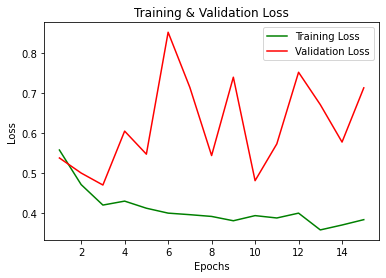

In [24]:
loss_train = models.history['loss']
loss_dev = models.history['val_loss']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_dev, 'r', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

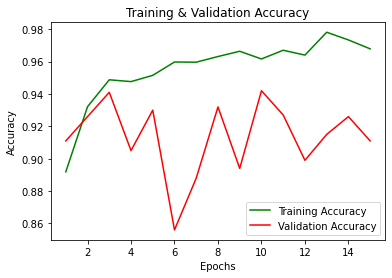

In [25]:
accuracy_train = models.history['accuracy']
accuracy_dev = models.history['val_accuracy']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, accuracy_dev, 'r', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.show()

In [26]:
preds = catVDogModel.evaluate(X_test,Y_test,batch_size=32,verbose=1,sample_weight = None)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1000/1000 [==============================] - 60s 60ms/step

Loss = 0.49751680040359497
Test Accuracy = 0.9160000085830688


## Upload your own photo to play with the model

It's a cat!


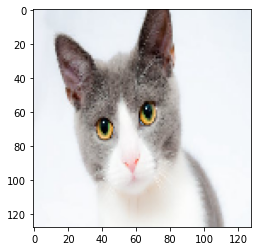

In [27]:
# upload a cat photo example
img_path = 'images/cat1.jpg'

img = image.load_img(img_path, target_size=(128, 128))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 0 is cat 1 is dog
#print(int(catVDogModel.predict(x)[0][0]))
print("It's a cat!" if int(catVDogModel.predict(x)[0][0]) == 0 else "It's a dog!")

It's a dog!


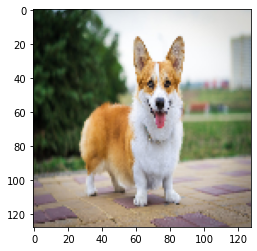

In [35]:
# upload a dog photo example
img_path = 'images/dog1.jpg'

img = image.load_img(img_path, target_size=(128, 128))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 0 is cat 1 is dog
#print(int(catVDogModel.predict(x)[0][0]))
print("It's a cat!" if int(catVDogModel.predict(x)[0][0]) == 0 else "It's a dog!")

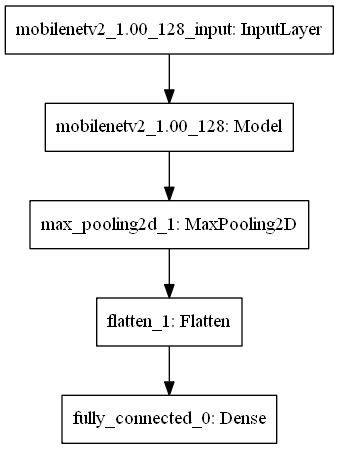

In [36]:
plot_model(catVDogModel, to_file='catVDogModel.png')
#SVG(model_to_dot(catVDogModel).create(prog='dot', format='svg'))